In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
air_ml_df = pd.read_csv(os.path.join("weekly_final_data.csv"))

In [3]:
ic_air_ml_df = air_ml_df.loc[air_ml_df["visitors"]==0]
ic_air_ml_df.head(5)

remove_area = list(ic_air_ml_df["air_area_name"].unique())
remove_area

['Hokkaidō Katō-gun Motomachi',
 'Niigata-ken Kashiwazaki-shi Chūōchō',
 'Fukuoka-ken Fukuoka-shi Tenjin',
 'Tōkyō-to Meguro-ku Takaban',
 'Tōkyō-to Chiyoda-ku Kanda Jinbōchō',
 'Tōkyō-to Musashino-shi Midorichō',
 'Tōkyō-to Adachi-ku Chūōhonchō',
 'Tōkyō-to Kōtō-ku Tomioka',
 'Hokkaidō Sapporo-shi Atsubetsuchūō 1 Jō',
 'Tōkyō-to Edogawa-ku Chūō',
 'Hokkaidō Sapporo-shi Kita 24 Jōnishi',
 'Tōkyō-to Fuchū-shi Miyanishichō',
 'Ōsaka-fu Ōsaka-shi Ōhiraki',
 'Niigata-ken Niigata-shi Teraohigashi',
 'Ōsaka-fu Ōsaka-shi Nanbasennichimae',
 'Fukuoka-ken Kitakyūshū-shi Konyamachi',
 'Hyōgo-ken Amagasaki-shi Higashinanamatsuchō',
 'Tōkyō-to Musashino-shi Kichijōji Honchō',
 'Tōkyō-to Taitō-ku Asakusa',
 'Ōsaka-fu Suita-shi Izumichō',
 'Tōkyō-to Toshima-ku Sugamo',
 'Tōkyō-to Meguro-ku Jiyūgaoka',
 'Fukuoka-ken Fukuoka-shi Imaizumi',
 'Tōkyō-to Shibuya-ku Higashi',
 'Tōkyō-to Setagaya-ku Kitazawa']

In [4]:
for area in remove_area:
    air_ml_df = air_ml_df[air_ml_df.air_area_name != area]

In [5]:
true_false_df = air_ml_df.isin(remove_area)
true_false_df["air_area_name"].unique()

array([False])

In [7]:
nz_ml_df = air_ml_df
nz_ml_df.to_csv("weekly_final_data.csv")

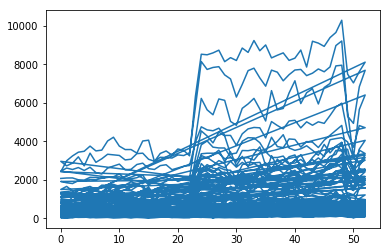

In [46]:
y = air_ml_df["visitors"]
x = air_ml_df["current_week"]

plt.plot(x,y)

In [47]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
nz_ml_df["air_area_name"] = number.fit_transform(nz_ml_df["air_area_name"].astype('str'))

nz_ml_df = nz_ml_df[["air_area_name","current_week","visitors"]]
nz_ml_df = nz_ml_df.reset_index()

In [48]:
len(nz_ml_df["air_area_name"])

4134

In [49]:
air_uni = list(nz_ml_df["air_area_name"].unique())

In [77]:
nz_ml_df["1_week_ago_visitors"] = 0
for x in range(len(nz_ml_df["air_area_name"])):
    for air_id in air_uni:
        if(nz_ml_df["air_area_name"][x] == air_id):
            if x > 0:
                nz_ml_df["1_week_ago_visitors"][x] = nz_ml_df["visitors"][x-1]
nz_ml_df.head(56)

,index,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
0,0,46,0,2069,0,2069
1,1,46,1,2092,2069,23
2,2,46,2,2095,2092,3
3,3,46,3,1999,2095,-96
4,4,46,4,1983,1999,-16
5,5,46,5,2127,1983,144
6,6,46,6,2118,2127,-9
7,7,46,7,2085,2118,-33
8,8,46,8,2121,2085,36
9,9,46,9,2157,2121,36


In [51]:
#NO NEED TO ADJUST DATA BELOW THIS.
#just grab based off of weeks.
nz_ml_df["1_week_ago_diff_1_week_ago_visitors"] = nz_ml_df["visitors"] - nz_ml_df["1_week_ago_visitors"]
weekzerodrop_ml_df = nz_ml_df[nz_ml_df["current_week"] != 0]

In [76]:
weekzerodrop_ml_df.head(56)

,index,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
1,1,46,1,2092,2069,23
2,2,46,2,2095,2092,3
3,3,46,3,1999,2095,-96
4,4,46,4,1983,1999,-16
5,5,46,5,2127,1983,144
6,6,46,6,2118,2127,-9
7,7,46,7,2085,2118,-33
8,8,46,8,2121,2085,36
9,9,46,9,2157,2121,36
10,10,46,10,2295,2157,138


In [53]:
init_one_nz_ml_df = nz_ml_df.loc[nz_ml_df["current_week"] == 1]
init_one_nz_ml_df.head(5)

,index,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
1,1,46,1,2092,2069,23
54,54,55,1,178,175,3
107,107,28,1,835,768,67
160,160,0,1,2987,2416,571
213,213,22,1,567,586,-19


In [54]:
features = ['air_area_name','current_week','1_week_ago_diff_1_week_ago_visitors']
X = init_one_nz_ml_df[list(features)].values
y = init_one_nz_ml_df['visitors'].values
y = y.reshape(-1,1)
y.shape
X.shape

(78, 3)

In [55]:
week_two_nz_ml_df = nz_ml_df.loc[nz_ml_df["current_week"] == 2]
week_two_nz_ml_df.head(5)

,index,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
2,2,46,2,2095,2092,3
55,55,55,2,121,178,-57
108,108,28,2,887,835,52
161,161,0,2,3238,2987,251
214,214,22,2,606,567,39


In [56]:
features = ['air_area_name','current_week','1_week_ago_diff_1_week_ago_visitors']
X_2 = week_two_nz_ml_df[list(features)].values
y_2 = week_two_nz_ml_df['visitors'].values
y_2 = y_2.reshape(-1,1)
y_2.shape
X_2.shape

(78, 3)

In [57]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_train = X
y_train = y
### END SOLUTION

X_test = X_2
y_test = y_2

In [58]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

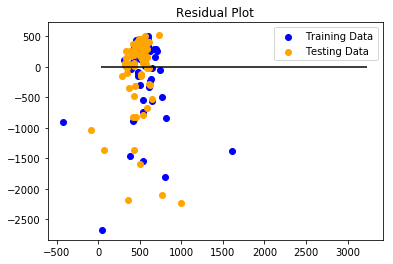

In [59]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test)
# model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [60]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 386093.0758937935, R2: 0.0381478112420105


In [61]:
#2 week shift
init_two_nz_ml_df = nz_ml_df.loc[(nz_ml_df["current_week"] == 1) | (nz_ml_df["current_week"] == 2)]
init_two_nz_ml_df.head(5)

,index,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
1,1,46,1,2092,2069,23
2,2,46,2,2095,2092,3
54,54,55,1,178,175,3
55,55,55,2,121,178,-57
107,107,28,1,835,768,67


In [62]:
features = ['air_area_name','current_week','1_week_ago_diff_1_week_ago_visitors']
X = init_two_nz_ml_df[list(features)].values
y = init_two_nz_ml_df['visitors'].values
y = y.reshape(-1,1)
y.shape
X.shape

(156, 3)

In [63]:
week_three_nz_ml_df = nz_ml_df.loc[nz_ml_df["current_week"] == 3]
week_three_nz_ml_df.head(5)

,index,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
3,3,46,3,1999,2095,-96
56,56,55,3,146,121,25
109,109,28,3,990,887,103
162,162,0,3,3433,3238,195
215,215,22,3,595,606,-11


In [64]:
features = ['air_area_name','current_week','1_week_ago_diff_1_week_ago_visitors']
X_3 = week_three_nz_ml_df[list(features)].values
y_3 = week_three_nz_ml_df['visitors'].values
y_3 = y_3.reshape(-1,1)
y_3.shape
X_3.shape

(78, 3)

In [65]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_train = X
y_train = y
### END SOLUTION

X_test = X_3
y_test = y_3

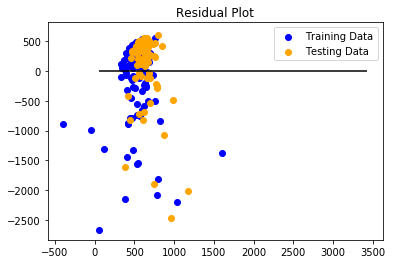

In [66]:
#FIT NEW DATA IN 

model.fit(X_train, y_train)
### END SOLUTION

# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test)
# model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [67]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 376493.1005958947, R2: 0.1537591398287793


In [68]:
#3 week shift
init_three_nz_ml_df = nz_ml_df.loc[(nz_ml_df["current_week"] == 1) | (nz_ml_df["current_week"] == 2) | (nz_ml_df["current_week"] == 3)]
init_three_nz_ml_df.head(5)

,index,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
1,1,46,1,2092,2069,23
2,2,46,2,2095,2092,3
3,3,46,3,1999,2095,-96
54,54,55,1,178,175,3
55,55,55,2,121,178,-57


In [69]:
features = ['air_area_name','current_week','1_week_ago_diff_1_week_ago_visitors']
X = init_three_nz_ml_df[list(features)].values
y = init_three_nz_ml_df['visitors'].values
y = y.reshape(-1,1)
y.shape
X.shape

(234, 3)

In [70]:
week_four_nz_ml_df = nz_ml_df.loc[nz_ml_df["current_week"] == 4]
week_four_nz_ml_df.head(5)

,index,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
4,4,46,4,1983,1999,-16
57,57,55,4,175,146,29
110,110,28,4,899,990,-91
163,163,0,4,3481,3433,48
216,216,22,4,562,595,-33


In [71]:
features = ['air_area_name','current_week','1_week_ago_diff_1_week_ago_visitors']
X_4 = week_four_nz_ml_df[list(features)].values
y_4 = week_four_nz_ml_df['visitors'].values
y_4 = y_4.reshape(-1,1)
y_4.shape
X_4.shape

(78, 3)

In [72]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_train = X
y_train = y
### END SOLUTION

X_test = X_4
y_test = y_4

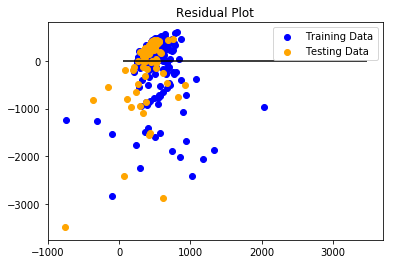

In [73]:
#FIT NEW DATA IN 

model.fit(X_train, y_train)
### END SOLUTION

# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test)
# model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [74]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 541152.2596389371, R2: -0.3047158305857256
